#Digital image recognition Case Study

##Step 1 Research goal: can we classify numbers of images as the correct numbers. 

##Imports

In [22]:
from sklearn.datasets import load_digits
import pylab as pl 

##Step 2 & 3: retrieving data & cleansing

data is already present in the sci-kit learn library.
The data is inherently "unclean" as the images are never a perfect representation of the number.
The whole excercise is to deal with this.

In [23]:
digits = load_digits() 

##Step 4 : data exploration

###Show image number 0 (which is also "0")

<Figure size 640x480 with 0 Axes>

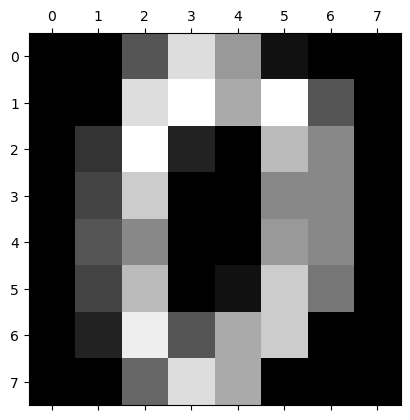

In [24]:
pl.gray()
pl.matshow(digits.images[0])    
pl.show()

###Show matrix representation of the number 0

In [25]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

##Step 5: data modelling

### Supervised learning: classifying images of numbers

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

y = digits.target #A

n_samples = len(digits.images) #B
X= digits.images.reshape((n_samples, -1)) #B

print (X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #C

gnb = GaussianNB()#D
fit = gnb.fit(X_train,y_train)#E
predicted = fit.predict(X_test)#F
confusion_matrix(y_test, predicted)#G

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

In [29]:
#A Step 1: Select target variable
#B Step 2: Prepare data. Reshape adapts the matrix form. This method could for instance turn a 10x10 matrix into 100 vectors.
#C Step 3: Split into a test set and training set
#D Step 4: Select a Naïve Bayes classified; use a Gaussian distribution to estimate the probability
#E Step 5: Fit the data
#F Step 6: Predict the data for unseen data
#G Step 7: Create the confusion matrix

##Step 6: Presentation & automation

###Visually showing the predictions

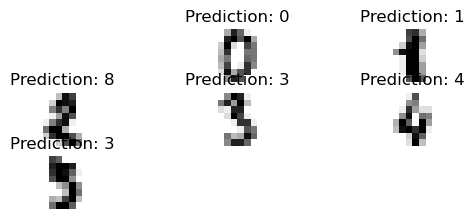

In [31]:
images_and_predictions = list(zip(digits.images, fit.predict(X)))#A
for index, (image, prediction) in enumerate(images_and_predictions[:6]):#B
    plt.subplot(6, 3 ,index + 5)#C
    plt.axis('off')#D
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')#E
    plt.title('Prediction: %i' % prediction)#f
plt.show()#G

In [32]:
images_and_predictions

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

In [33]:
#A store the number image matrix and its prediction (as a number) together in an array
#B loop through the first 7 images
#C add an extra subplot on a 6 by 3 plot grid. This code could be simplified as:
#plt.subplot(3, 2 ,index) but this looks visually more appealing. 
#D don't show an axis
#E show the image in grayscale
#F show the predicted value as the title to the shown image
#G show the full plot that is now populated with 6 subplots

#Wine Quality Case Study

##Imports

In [34]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt
from sklearn import preprocessing

##Step 2: retrieving data

###Data is drawn from an online machine learning data set archive

In [35]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' #A 
data = pd.read_csv(url, sep= ";")#B

In [36]:
#A Download location of wine-quality dataset
#B read in the csv data , it is separated by semi-colon

##Step 3: data cleansing

###Split dataset in independent (X) and dependent (y) variables

In [37]:
X = data[[u'fixed acidity', u'volatile acidity', u'citric acid', 
      u'residual sugar', u'chlorides', u'free sulfur dioxide', 
      u'total sulfur dioxide', u'density', u'pH', u'sulphates', 
      u'alcohol']] #C
y = data.quality #D 

In [38]:
#C X is a matrix of predictor variables. These variables are wine properties like density, alcohol presence etc.
#D y is a vector and represents the dependent variable (target variable). y is the perceived wine quality.

###Variable standardisation 

In [39]:
X = preprocessing.StandardScaler().fit(X).transform(X) #E

In [40]:
#E When standardizing data, the following formula is applied to every datapoint:
# z = (x-μ)/σ 
# z is the new obsevation value , x the old one. μ is the mean and σ the standard deviation. 
# PCA of a data matrix is easier to interpret when the columns have first been centered by their means. 

##Step 4: data exploration

###principal component analysis (PCA) for dimentionality reduction

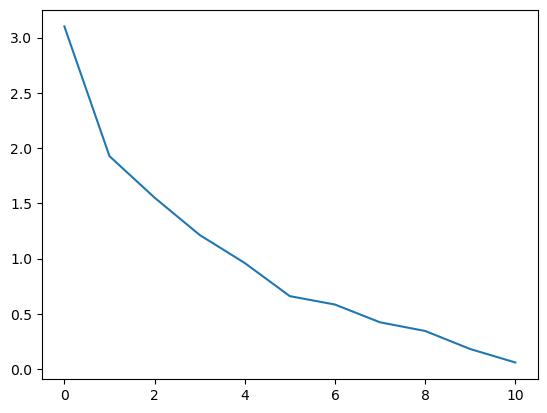

In [41]:
model = PCA() #A
results = model.fit(X) #B
Z = results.transform(X) #C
plt.plot(results.explained_variance_) #D
plt.show() #E

In [42]:
#A create an instance of principal component analysis class
#B apply PCA on the predictor variables to see if they can be compacted into less variables
#C turn the result into an actual array so we can use the newly created data
#D plot the explained variance in variables, this plot is called a scree plot
#E show the plot

In [43]:
print(results.components_)

[[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
 [-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
  -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
 [-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
  -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
 [ 0.10147858  0.41144893  0.06959338  0.04915555  0.30433857 -0.01400021
   0.13630755 -0.3911523  -0.52211645 -0.38126343  0.36164504]
 [-0.35022736 -0.5337351   0.10549701  0.29066341  0.37041337 -0.11659611
  -0.09366237 -0.17048116 -0.02513762 -0.44746911 -0.3276509 ]
 [-0.17759545 -0.07877531 -0.37751558  0.

##step 3 revisited: data preparation

###Using the PCA analysis we will compress the data to just a few principal components

In [44]:
pd.DataFrame(results.components_, columns=list([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide',  u'total sulfur dioxide', u'density', u'pH', u'sulphates',  u'alcohol']))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


In [45]:
#The table shows how each original variable loads to the newly created factors. 

In [46]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

##Step 5: data modelling

###Wine score prediction without  principal components analysis

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

gnb = GaussianNB() #A
fit = gnb.fit(X,y) #B             
pred = fit.predict(X) #C            
print (confusion_matrix(pred,y))#D      

[[  3   1   4   0   0   0]
 [  2   8  26  19   1   0]
 [  4  29 456 185  12   0]
 [  1  13 171 318  74   5]
 [  0   1  24 111 110  11]
 [  0   1   0   5   2   2]]


In [52]:
print (confusion_matrix(pred,y).trace())#E

897


In [53]:
#A Use a Gaussian distribution Naïve Bayes classifier for estimation
#B Fit the data
#C Predict the data for unseen data
#D Study the confusion matrix
#E count of all correctly classified cases: all counts on the trace or diagonal summed up

###Wine score prediction with increasing number of Principal components

[712]
[712, 816]
[712, 816, 903]
[712, 816, 903, 893]
[712, 816, 903, 893, 904]
[712, 816, 903, 893, 904, 920]
[712, 816, 903, 893, 904, 920, 930]
[712, 816, 903, 893, 904, 920, 930, 927]
[712, 816, 903, 893, 904, 920, 930, 927, 937]


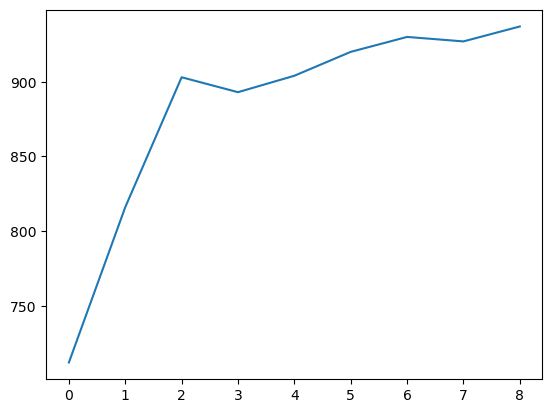

In [56]:
predicted_correct = []#A
for i in range(1,10):#B
    model = PCA(n_components = i)#C
    results = model.fit(X)#D
    Z = results.transform(X) #E
    fit = gnb.fit(Z,y) #F
    pred = fit.predict(Z)#G
    predicted_correct.append(confusion_matrix(pred,y).trace())#H
    print (predicted_correct) #I
plt.plot(predicted_correct) #J
plt.show()#K

In [57]:
#A array will be filled with correctly predicted observations
#B loop through the first 10 detected principal components
#C istantiate a PCA model with 1 component (first iteration) up to 10 components (in 10th iteration)
#D fit the PCA model on the x-variables (features)
#E Z is the result in matrix form (actually an array filled with arrays)
#F Use a Gaussian distribution Naïve Bayes classifier for estimation.
#G the actual prediction itself using the fitted model
#H at the end of each iteration we append the number of correctly classified observations
#I printing this array we can see how after each iteration the new count of correctly classified observations is appended 
#J It's easier to see when plot the array
#K The plot is shown

#Iris classification example

In [59]:
import sklearn as sklearn
from sklearn import cluster
import pandas as pd

data = sklearn.datasets.load_iris()  #A                        
X = pd.DataFrame(data.data, columns = list(data.feature_names))  #B 
print (X[:5]) #C
model   = cluster.KMeans(n_clusters=3, random_state=25)  #D                
results = model.fit(X) #E            
X["cluster"] = results.predict(X) #F       
X["target"] = data.target #G
X["c"] = "lookatmeIamimportant" #H
print (X[:5]) #I
classification_result = X[["cluster", "target","c"]].groupby(["cluster","target"]).agg("count")  #J
print(classification_result)#K

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\Eugene Kalaidin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eugene Kalaidin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  target                     c  
0        0       0  lookatmeIamimportant  
1        0       0  lookatmeIamimportant  
2        0       0  lookatmeIamimportant  
3        0       0  lookatmeIamimportant  
4        0       0  lookatmeIamimportant  
                 c
cluster target    
0       0       50
1       1       48
        2       14
2       1        2
        2       36


In [60]:
#A load in the iris (flowers) data of scikit learn
#B transform the iris data into a pandas dataframe
#C print the first 5 observations of the dataframe to the screen, now we can clearly see the 4 variables: sepal length, sepal width, petal length and petal width
#D initialise a kmeans cluster model with 3 clusters. the random_state is just a random seed, if you don't put it, the seed will also be random.
# we opt for 3 clusters because we saw in the last listing this might be a good compromise between complexity and performance
#E fit the model to the data. All variables are considered independent variables, there is no target variable (y) in unsupervised learninh
#F add another variable called "cluster" to the dataframe. This indicates the cluster membership of every flower in the dataset
#G let's finally add a target variable (y) to the dataframe 
#H adding a variable "c" is just a little trick we use to do a count later. the value here is really arbitrary since we just need a column to count the rows
#I there are 3 parts to this code, first we select the "cluster", "target" and "c" column. Then we group by the "cluster" and "target" column. Finally we aggregate the row of the group by with a simple count aggregation
#K the matrix this classification result represents gives us an indication of whether our clustering was successful. For cluster 0, we are spot on, on clusters 1 and 2 there has been a slight mixup but in total we only get 16 (14+2) misclassifications out of 150.  